# 딥러닝3 : 다중분류


## 1.환경준비

### (1) 라이브러리 로딩

In [11]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split
from sklearn.metrics import *
from sklearn.preprocessing import MinMaxScaler

from keras.models import Sequential
from keras.layers import Dense
from keras.backend import clear_session
from keras.optimizers import Adam

* 함수 만들기

In [12]:
# 학습곡선 함수
def dl_history_plot(history):
    plt.figure(figsize=(10,6))
    plt.plot(history['loss'], label='train_err', marker = '.')
    plt.plot(history['val_loss'], label='val_err', marker = '.')

    plt.ylabel('Loss')
    plt.xlabel('Epoch')
    plt.legend()
    plt.grid()
    plt.show()

### (2) 데이터로딩

In [13]:
path = "https://raw.githubusercontent.com/DA4BAM/dataset/master/iris.csv"
data = pd.read_csv(path)
data.head()

,Sepal.Length,Sepal.Width,Petal.Length,Petal.Width,Species
0,5.1,3.5,1.4,0.2,setosa
1,4.9,3.0,1.4,0.2,setosa
2,4.7,3.2,1.3,0.2,setosa
3,4.6,3.1,1.5,0.2,setosa
4,5.0,3.6,1.4,0.2,setosa


## 2.데이터 준비

### (1) y 값을 0,1,2로 변환하기
(sparse_categorical_crossentropy 사용을 위해)

In [14]:
data['Species'] = data['Species'].map({'setosa':0, 'versicolor':1, 'virginica':2})
data.head()

,Sepal.Length,Sepal.Width,Petal.Length,Petal.Width,Species
0,5.1,3.5,1.4,0.2,0
1,4.9,3.0,1.4,0.2,0
2,4.7,3.2,1.3,0.2,0
3,4.6,3.1,1.5,0.2,0
4,5.0,3.6,1.4,0.2,0


### (2) 데이터 준비

In [15]:
target = 'Species'
x = data.drop(target, axis = 1)
y = data.loc[:, target]

### (3) 데이터 분할 : train : val

In [16]:
x_train, x_val, y_train, y_val = train_test_split(x, y, test_size = .3, random_state = 20)

### (4) Scaling

In [17]:
scaler = MinMaxScaler()
x_train = scaler.fit_transform(x_train)
x_val = scaler.transform(x_val)

## 3.모델링1

### (1) 모델 설계

In [ ]:
nfeatures = x_train.shape[1] #num of columns
nfeatures

4

In [ ]:
# 메모리 정리
clear_session()

# Sequential
model = Sequential( Dense( 3 , input_shape = (nfeatures,), activation = 'softmax') )

# 모델요약
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 3)                 15        
                                                                 
Total params: 15 (60.00 Byte)
Trainable params: 15 (60.00 Byte)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


### (2) compile + 학습

In [ ]:
model.compile(optimizer=Adam(learning_rate=0.1), loss= 'sparse_categorical_crossentropy')

history = model.fit(x_train, y_train, epochs = 50, validation_split=0.2, verbose=0).history

* 학습결과 그래프

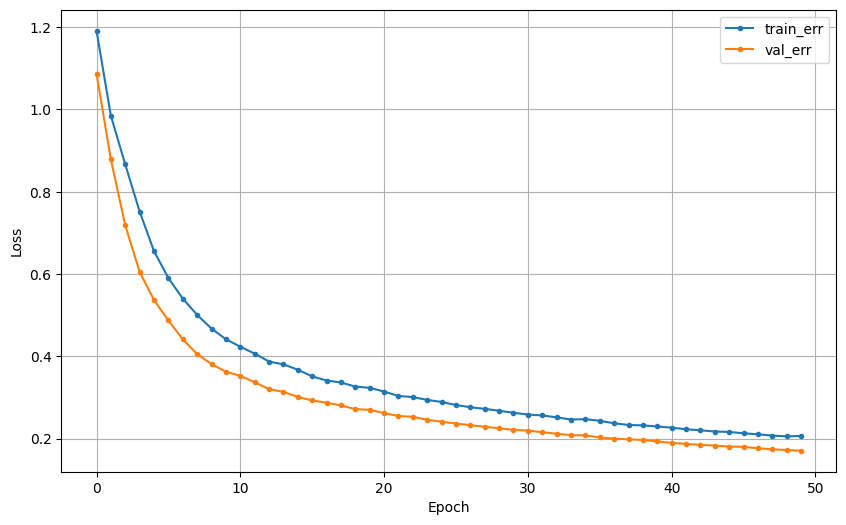

In [ ]:
dl_history_plot(history)

### (3) 예측 및 검증
* 예측 결과는 softmax로 변환된 값 입니다.

In [ ]:
pred = model.predict(x_val)
pred[:5]

2/2 [==============================] - 0s 6ms/step


array([[9.7644752e-01, 2.3455566e-02, 9.6859367e-05],
       [9.6699735e-03, 8.1424880e-01, 1.7608127e-01],
       [1.2272821e-02, 7.5073355e-01, 2.3699355e-01],
       [3.4953209e-04, 3.9329156e-01, 6.0635895e-01],
       [3.0885562e-02, 8.8959283e-01, 7.9521626e-02]], dtype=float32)

* 행 별로 제일 큰 값을 찾아서 그에 맞게 숫자(0,1,2)로 변환 합시다.

In [ ]:
# 5개 행만 살펴보면
np.argmax(pred[:5], axis = 1)

array([0, 1, 1, 2, 1])

In [ ]:
# 전체에 적용해서 변환합시다.
pred_1 = pred.argmax(axis=1) # argmax: max값이 아닌 max가 되는 인덱스를 찾기
pred_1

array([0, 1, 1, 2, 1, 1, 2, 0, 2, 0, 2, 1, 1, 0, 0, 2, 0, 1, 2, 1, 1, 2,
       2, 0, 1, 1, 1, 0, 2, 1, 1, 1, 0, 0, 0, 1, 1, 0, 1, 2, 1, 1, 0, 1,
       1])

* 실제값 y_val은 0,1,2 로 된 1차원 값입니다.

In [ ]:
y_val

47     0
73     1
74     1
129    2
67     1
89     1
143    2
21     0
108    2
12     0
147    2
76     1
119    2
35     0
28     0
122    2
13     0
58     1
114    2
57     1
50     1
149    2
111    2
20     0
72     1
81     1
98     1
34     0
104    2
133    2
95     1
88     1
0      0
46     0
11     0
106    2
85     1
1      0
51     1
130    2
55     1
134    2
37     0
65     1
56     1
Name: Species, dtype: int64

In [ ]:
print(confusion_matrix(y_val, pred_1))
print(classification_report(y_val, pred_1))

[[13  0  0]
 [ 0 18  0]
 [ 0  4 10]]
              precision    recall  f1-score   support

           0       1.00      1.00      1.00        13
           1       0.82      1.00      0.90        18
           2       1.00      0.71      0.83        14

    accuracy                           0.91        45
   macro avg       0.94      0.90      0.91        45
weighted avg       0.93      0.91      0.91        45



----

## 4.모델링2 : hidden layer

### (1) 모델1

* 다음의 summary를 보고 모델을 설계하시오.

| Layer (type) | Output Shape | Param # | 옵션 |
| ---- | ---- | ---- | ---- |
| dense (Dense) | (None, 8) | 40 | node, input_shape, activation = 'relu' |
| dense_1 (Dense) | (None, 3) | 27 | node, activation = 'softmax'  |

In [ ]:
# 메모리 정리
clear_session()

# Sequential 타입 모델 선언
model = Sequential([Dense(8 , input_shape = (nfeatures,), activation = 'relu'),
                    Dense(3 , activation = 'softmax') ])

# 모델요약
model.summary()

4

* compile + 학습

In [ ]:
model.compile(optimizer=Adam(learning_rate=0.01), loss= 'sparse_categorical_crossentropy')

history = model.fit(x_train, y_train, epochs = 100, validation_split=0.2).history

Epoch 1/100
3/3 [==============================] - 1s 132ms/step - loss: 0.1016 - val_loss: 0.0877
Epoch 2/100
3/3 [==============================] - 0s 23ms/step - loss: 0.1015 - val_loss: 0.0875
Epoch 3/100
3/3 [==============================] - 0s 26ms/step - loss: 0.1011 - val_loss: 0.0874
Epoch 4/100
3/3 [==============================] - 0s 23ms/step - loss: 0.1010 - val_loss: 0.0873
Epoch 5/100
3/3 [==============================] - 0s 22ms/step - loss: 0.1012 - val_loss: 0.0872
Epoch 6/100
3/3 [==============================] - 0s 24ms/step - loss: 0.1010 - val_loss: 0.0871
Epoch 7/100
3/3 [==============================] - 0s 24ms/step - loss: 0.1007 - val_loss: 0.0870
Epoch 8/100
3/3 [==============================] - 0s 35ms/step - loss: 0.1008 - val_loss: 0.0870
Epoch 9/100
3/3 [==============================] - 0s 25ms/step - loss: 0.1004 - val_loss: 0.0869
Epoch 10/100
3/3 [==============================] - 0s 37ms/step - loss: 0.1005 - val_loss: 0.0869
Epoch 11/100
3/3 [

* 학습결과 그래프

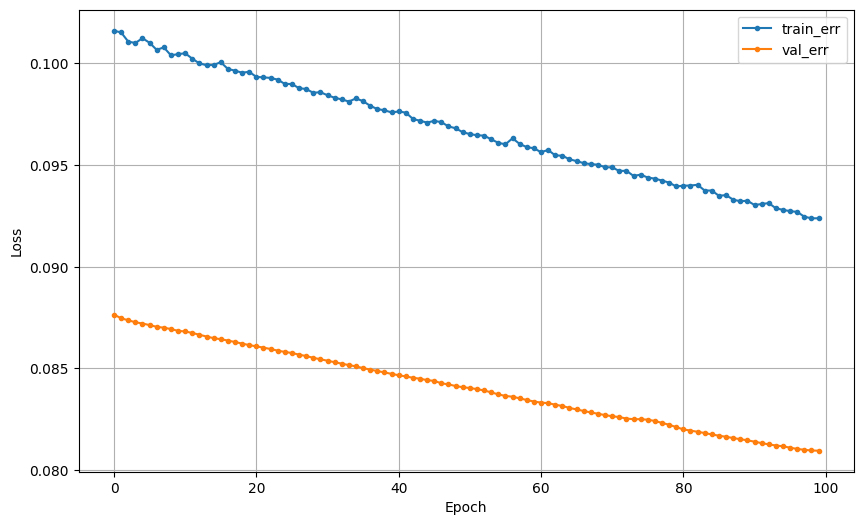

In [ ]:
dl_history_plot(history)

* 예측 및 검증
    * 예측 결과는 softmax로 변환된 값 입니다.

In [ ]:
pred = model.predict(x_val)
pred_1 = pred.argmax(axis=1)

2/2 [==============================] - 0s 4ms/step


In [ ]:
print(confusion_matrix(y_val, pred_1))
print(classification_report(y_val, pred_1))

[[13  0  0]
 [ 0 18  0]
 [ 0  4 10]]
              precision    recall  f1-score   support

           0       1.00      1.00      1.00        13
           1       0.82      1.00      0.90        18
           2       1.00      0.71      0.83        14

    accuracy                           0.91        45
   macro avg       0.94      0.90      0.91        45
weighted avg       0.93      0.91      0.91        45



### (2) 모델2

* 다음의 summary를 보고 모델을 설계하시오.

| Layer (type) | Output Shape | Param # | 옵션 |
| ---- | ---- | ---- | ---- |
| dense (Dense) | (None, 8) | 40 | node, input_shape, activation = 'relu' |
| dense_1 (Dense) | (None, 8) | 72 | node, activation = 'relu'  |
| dense_2 (Dense) | (None, 3) | 27 | node, activation = 'softmax'  |

In [ ]:
clear_session()
model = Sequential([
    Dense(8, input_shape=(nfeatures, ), activation='relu'),
    Dense(8, activation='relu'),
    Dense(3, activation = 'softmax')
])
model.summary()
# 노드의 수는 계속 실험해보며 성능 살펴봐야 함!

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 8)                 40        
                                                                 
 dense_1 (Dense)             (None, 8)                 72        
                                                                 
 dense_2 (Dense)             (None, 3)                 27        
                                                                 
Total params: 139 (556.00 Byte)
Trainable params: 139 (556.00 Byte)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


* compile + 학습

In [ ]:
model.compile(optimizer=Adam(learning_rate=0.01), loss='sparse_categorical_crossentropy')
history = model.fit(x_train, y_train, epochs = 50, validation_split=.2, verbose=0).history

* 학습결과 그래프

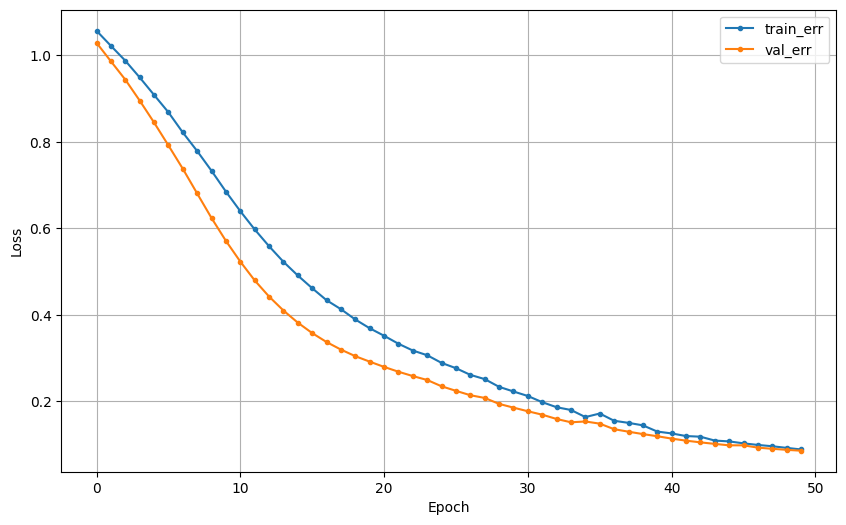

In [ ]:
dl_history_plot(history)

* 예측 및 검증
    * 예측 결과는 softmax로 변환된 값 입니다.

In [ ]:
y_pred = model.predict(x_val)
y_pred = y_pred.argmax(axis=1)

2/2 [==============================] - 0s 5ms/step


In [ ]:
print(classification_report(y_val, y_pred))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00        13
           1       0.95      1.00      0.97        18
           2       1.00      0.93      0.96        14

    accuracy                           0.98        45
   macro avg       0.98      0.98      0.98        45
weighted avg       0.98      0.98      0.98        45



### (3) 모델3

* 여러분이 원하는 형태로 설계를 해 봅시다.

* compile + 학습

* 학습결과 그래프

* 예측 및 검증
    * 예측 결과는 softmax로 변환된 값 입니다.

## 5.참조 : y를 one-hot encoding 하여 모델링

* y 가변수화 : to_categorical
* 컴파일에서 loss = 'categorical_crossentropy'

In [9]:
from keras.utils import to_categorical

### (1) y에 대한 가변수화

In [18]:
y

0      0
1      0
2      0
3      0
4      0
      ..
145    2
146    2
147    2
148    2
149    2
Name: Species, Length: 150, dtype: int64

In [19]:
y_c = to_categorical(y.values, 3) # 범주 개수 3개

In [20]:
y_c[:5]

array([[1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.]], dtype=float32)

### (2) 데이터 분할2 : train : val

In [21]:
x_train, x_val, y_train, y_val = train_test_split(x, y_c, test_size = .3, random_state = 2022)

In [23]:
y_train.shape

(105, 3)

In [25]:
x_train[:5]

,Sepal.Length,Sepal.Width,Petal.Length,Petal.Width
136,6.3,3.4,5.6,2.4
102,7.1,3.0,5.9,2.1
120,6.9,3.2,5.7,2.3
3,4.6,3.1,1.5,0.2
149,5.9,3.0,5.1,1.8


In [27]:
y_train[:5]

array([[0., 0., 1.],
       [0., 0., 1.],
       [0., 0., 1.],
       [1., 0., 0.],
       [0., 0., 1.]], dtype=float32)

### (3) Scaling

In [28]:
scaler = MinMaxScaler()
x_train = scaler.fit_transform(x_train)
x_val = scaler.transform(x_val)

### (4) 모델 설계

In [29]:
nfeatures = x_train.shape[1] # num of columns
nfeatures

4

In [30]:
# 메모리 정리
clear_session()

# Sequential
model = Sequential([Dense(3, input_shape = (nfeatures,), activation = 'softmax')])

# 모델요약
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 3)                 15        
                                                                 
Total params: 15 (60.00 Byte)
Trainable params: 15 (60.00 Byte)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


### (5) compile + 학습

* lr과 learning_rate은 같은 의미 입니다. 그러나 향후 버전에서는 lr이 제외될 예정이라고 합니다.
* y를 one-hot encoding 했다면, loss fuction은 **categorical_crossentropy** 입니다.

In [31]:
model.compile(optimizer=Adam(learning_rate=0.1), loss='categorical_crossentropy')

history = model.fit(x_train, y_train, epochs = 100,
                    validation_split=0.2).history

Epoch 1/100
3/3 [==============================] - 1s 109ms/step - loss: 1.2073 - val_loss: 1.0831
Epoch 2/100
3/3 [==============================] - 0s 17ms/step - loss: 1.0295 - val_loss: 1.0060
Epoch 3/100
3/3 [==============================] - 0s 19ms/step - loss: 0.9218 - val_loss: 0.8505
Epoch 4/100
3/3 [==============================] - 0s 18ms/step - loss: 0.7969 - val_loss: 0.7176
Epoch 5/100
3/3 [==============================] - 0s 19ms/step - loss: 0.7051 - val_loss: 0.6225
Epoch 6/100
3/3 [==============================] - 0s 16ms/step - loss: 0.6374 - val_loss: 0.5608
Epoch 7/100
3/3 [==============================] - 0s 17ms/step - loss: 0.5941 - val_loss: 0.5185
Epoch 8/100
3/3 [==============================] - 0s 18ms/step - loss: 0.5515 - val_loss: 0.4838
Epoch 9/100
3/3 [==============================] - 0s 17ms/step - loss: 0.5217 - val_loss: 0.4579
Epoch 10/100
3/3 [==============================] - 0s 16ms/step - loss: 0.4978 - val_loss: 0.4372
Epoch 11/100
3/3 [

* 학습결과 그래프

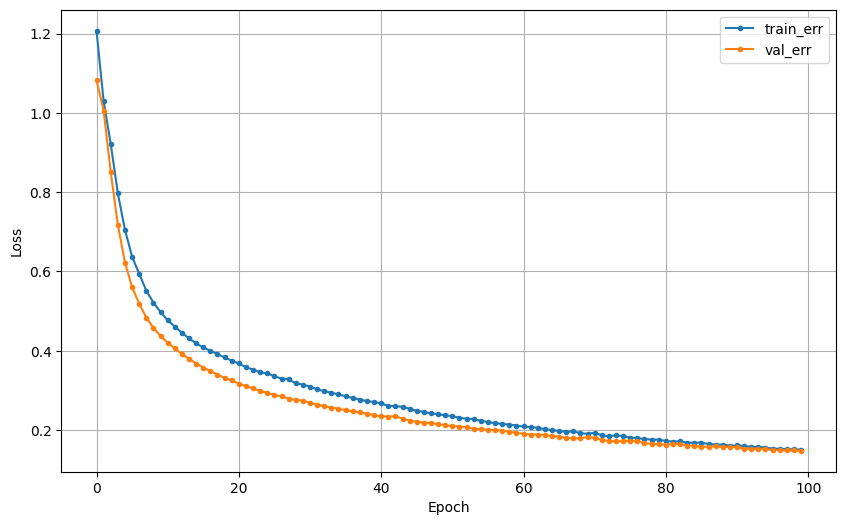

In [32]:
dl_history_plot(history)

### (6) 예측 및 평가
* 예측 결과는 softmax로 변환된 값 입니다.

In [33]:
pred = model.predict(x_val)
pred[:5]

2/2 [==============================] - 0s 5ms/step


array([[2.6823504e-05, 5.7743199e-02, 9.4223011e-01],
       [1.9269360e-06, 7.2645560e-02, 9.2735249e-01],
       [9.5902210e-01, 4.0975694e-02, 2.2543284e-06],
       [6.9513678e-04, 3.4457457e-01, 6.5473020e-01],
       [9.8336047e-01, 1.6639158e-02, 4.7882071e-07]], dtype=float32)

* 행 별로 제일 큰 값을 찾아서 그에 맞게 숫자(0,1,2)로 변환 합시다.

In [34]:
# 5개 행만 살펴보면
np.argmax(pred[:5], axis = 1)

array([2, 2, 0, 2, 0])

In [37]:
y_val[:5]

array([[0., 0., 1.],
       [0., 0., 1.],
       [1., 0., 0.],
       [0., 0., 1.],
       [1., 0., 0.]], dtype=float32)

In [38]:
# 전체에 적용해서 변환합시다.
pred_1 = pred.argmax(axis=1)
pred_1

array([2, 2, 0, 2, 0, 0, 1, 1, 0, 1, 1, 2, 1, 2, 2, 0, 1, 1, 2, 1, 0, 0,
       2, 0, 2, 1, 2, 0, 2, 2, 0, 1, 1, 0, 1, 0, 0, 1, 0, 1, 2, 1, 1, 2,
       2])

* 실제값 y_val도 원래 대로 돌려 놓습니다.

In [39]:
y_val[:5]

array([[0., 0., 1.],
       [0., 0., 1.],
       [1., 0., 0.],
       [0., 0., 1.],
       [1., 0., 0.]], dtype=float32)

In [40]:
y_val_1 = y_val.argmax(axis=1)
y_val_1

array([2, 2, 0, 2, 0, 0, 1, 1, 0, 1, 1, 2, 1, 2, 2, 0, 1, 2, 2, 1, 0, 0,
       2, 0, 2, 2, 2, 0, 1, 2, 0, 1, 1, 0, 1, 0, 0, 1, 0, 1, 2, 1, 1, 2,
       2])

y와 y hat 둘 다 비교하기 위해 정수값으로 바꿔줘야 함

In [41]:
print(confusion_matrix(y_val_1, pred_1))
print(classification_report(y_val_1, pred_1))

[[14  0  0]
 [ 0 14  1]
 [ 0  2 14]]
              precision    recall  f1-score   support

           0       1.00      1.00      1.00        14
           1       0.88      0.93      0.90        15
           2       0.93      0.88      0.90        16

    accuracy                           0.93        45
   macro avg       0.94      0.94      0.94        45
weighted avg       0.93      0.93      0.93        45

